<a href="https://colab.research.google.com/github/sgparrot/sgparrot2021Lv1-1/blob/main/2021_08_18_2%EC%A3%BC%EC%B0%A8(%EB%B0%B0%EC%B9%98%20%EC%A0%95%EA%B7%9C%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Batch Noramalization?

*학습속도의 안정화

*초깃값 설정에서 자유로움->Local Optimum문제의 가능성을 줄임

*오버피팅 억제

###Gradient Descent의 문제점

CNN을 학습시킬 때, Gradient Descent기반의 방법들은 Weight와 Bias의 변화가 얼마나 신경망의 출력값에 영향을 미치는가를 기준으로 학습을 진행한다. 하지만 모델이 적절하게 학습되었거나 혹은 완전히 잘못된 초기값을 가지게 된다면 Gradient 값이 0에 가깝거나 매우 커지게 되어(Graident Vanishing/Exploding) 학습이 제대로 되지 않는 경우가 발생한다. 또한, 파라미터의 초깃값에 따라 Gradient값을 최소화하는 과정으로 학습을 진행하면 Cost Function의 Local optimum에서 학습이 중단되는 문제가 발생하기도 한다.


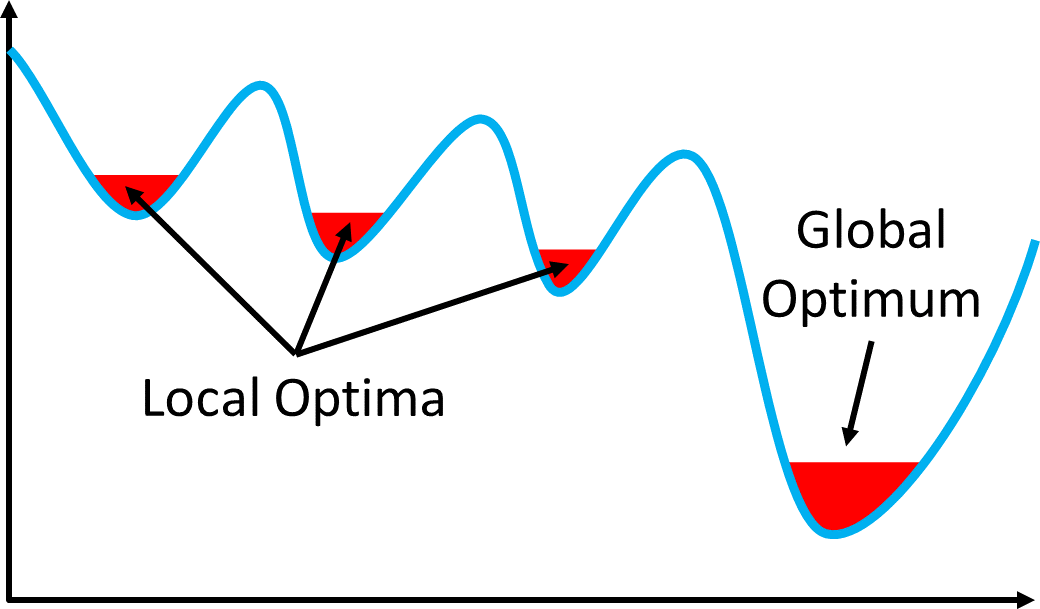

###Whitening

이러한 문제들의 근본적인 원인은 'Internal Covarience Shift'이다. 이는 CNN의 각 layer나 activation 마다 입력값의 분산이 달라지는 현상을 이른다. 즉 레이어를 통과할 때마다 각 노드의 출력값의 분포가 달라진다. 이를 해결키 위한 가장 단순한 방법은 각 레이어의 입력의 분산을 평균 0, 표준편차 1로 정규화 시키는 방법이다. 이를 Whitening이라 한다. 하지만, 이 과정에서 분산과 평균의 조정은 별개로 이루어지게 되어 일부 파라미터들의 영향이 무시된다. 따라서 단순히 Whitening만 거친다면 특정 파라미터들의 영향력만이 계속 커지는 상태가 발생한다.

###Batch Normalization

배치 정규화는 미니배치를 단위로 정규화를 진행한다. 각 미니배치의 평균과 분산을 이용해 정규화를 진행시키고, 이를 scale 및 shift시킨 후 진행한다. 이때 scale과 shift되는 값은 최적화를 통해서 학습된다. 이렇게 정규화 된 값을 활성화 함수에 입력해 최종 출력 값을 얻게 된다.

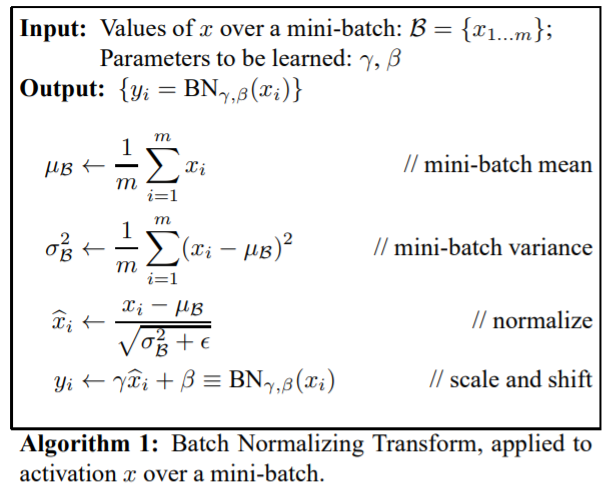


이때 normalize 과정에서 분산에 더해지는 e는 0으로 나누어지는 과정을 피하기 위한 안전장치이다. 

###Moving Average

모델의 학습시키는 과정에서는 미니 배치의 평균과 분산을 이용할 수 있지만, 이를 이용해 prediction하는 과정에서는 미니배치의 평균, 분산값들을 이용할 수 없다. 추론하고자 하는 데이터의 값만으로 배치 정규화가 온전히 이루어지지 않기 때문이다. 따라서 prediction과 test에서는 고정된 평균과 분산을 이용해 정규화를 수행하게 된다. 이를 위해서 미리 저장한 미니 배치의 이동 평균을 사용한다. 이동평균은 학습과정에서 구한 Sample Mean과 Sample Varience를 이용해 구하는데, 일반적으로 평균은 평균들의 평균으로, 분산은 분산의 평균에 m/m-1을 곱하여 구한다.